## Урок 7. Notebooks. Hue, Jupyter, Zeppelin.

**1. На основе импортированных в Hbase данных создать любой график в Jupyter или Zeppelin.**

In [280]:
# библиотека для подключения к БД hbase
import happybase
# библиотека для подсчёта количества элементов в строке
from collections import Counter
# библиотека для форматирования строки по регулярному выражению
import re
# библиотека для рисования графиков
import matplotlib.pyplot as plt
# библиотека для работы с массивами данных в python.
import numpy as np
# для рисования графиков в текущем окне
%matplotlib inline

Настроим соединение сбазой данных hbase.

In [281]:
connection = happybase.Connection(host='89.208.221.132', port=9090, autoconnect=True)

Создадим таблицу `Student3_7` с семейством колонок `Message`.

In [245]:
connection.create_table(
    'Student3_7',
    { 
        'Message': dict() 
    }
)

In [282]:
table = connection.table('Student3_7')

Колонку `Message:Text` заполним произвольным текстом.

In [283]:
with table.batch() as b:
    b.put(b'Message1', {b'Message:Text': b'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Lobortis scelerisque fermentum dui faucibus in ornare quam viverra orci. Vitae congue eu consequat ac felis donec et odio. Et leo duis ut diam. Egestas maecenas pharetra convallis posuere. Congue eu consequat ac felis donec. Id velit ut tortor pretium viverra suspendisse potenti. Sed risus pretium quam vulputate dignissim suspendisse in. Odio morbi quis commodo odio aenean sed. Vel orci porta non pulvinar neque. Tellus integer feugiat scelerisque varius morbi enim. Morbi tristique senectus et netus et. Ante metus dictum at tempor commodo ullamcorper a lacus vestibulum. Tristique sollicitudin nibh sit amet commodo nulla facilisi. Ut enim blandit volutpat maecenas volutpat blandit aliquam. Est ultricies integer quis auctor elit sed vulputate mi sit. Ut diam quam nulla porttitor massa. Adipiscing bibendum est ultricies integer quis auctor elit. At auctor urna nunc id cursus.'})
    b.put(b'Message2', {b'Message:Text': b'Eget felis eget nunc lobortis mattis. Interdum posuere lorem ipsum dolor. Tellus integer feugiat scelerisque varius. Nisi vitae suscipit tellus mauris a diam. Metus aliquam eleifend mi in nulla posuere sollicitudin. Adipiscing diam donec adipiscing tristique risus. Cursus mattis molestie a iaculis. Semper quis lectus nulla at. Aliquam eleifend mi in nulla. Ultrices neque ornare aenean euismod elementum nisi quis. At in tellus integer feugiat scelerisque. Proin fermentum leo vel orci porta non pulvinar neque laoreet. Lectus magna fringilla urna porttitor rhoncus dolor purus non. Viverra vitae congue eu consequat ac felis.'})
    b.put(b'Message3', {b'Message:Text': b'Tristique magna sit amet purus gravida quis. Sed euismod nisi porta lorem mollis aliquam. Est ultricies integer quis auctor. Ornare massa eget egestas purus viverra accumsan in nisl. Vestibulum sed arcu non odio. Libero enim sed faucibus turpis in eu. Sed tempus urna et pharetra pharetra massa massa. Lacus sed viverra tellus in hac. Lacus luctus accumsan tortor posuere ac ut consequat semper. Sapien pellentesque habitant morbi tristique senectus. Sit amet est placerat in egestas. Ornare quam viverra orci sagittis eu volutpat. Tellus integer feugiat scelerisque varius morbi enim nunc faucibus a. Pellentesque habitant morbi tristique senectus et netus. Consequat semper viverra nam libero justo laoreet sit.'})
    b.put(b'Message4', {b'Message:Text': b'Malesuada bibendum arcu vitae elementum curabitur vitae nunc sed velit. Semper risus in hendrerit gravida rutrum quisque non tellus. Ornare aenean euismod elementum nisi quis eleifend quam. Iaculis eu non diam phasellus vestibulum lorem. Sollicitudin tempor id eu nisl nunc mi ipsum. Morbi tempus iaculis urna id volutpat lacus laoreet. Diam maecenas ultricies mi eget mauris pharetra. Faucibus purus in massa tempor nec feugiat nisl. Leo in vitae turpis massa sed elementum tempus. Purus in massa tempor nec feugiat nisl pretium. Quis hendrerit dolor magna eget est lorem. Cras tincidunt lobortis feugiat vivamus at augue eget arcu. Nam libero justo laoreet sit amet cursus sit. Tempor orci dapibus ultrices in iaculis nunc sed augue lacus. Elementum integer enim neque volutpat ac tincidunt vitae semper.'})
    b.put(b'Message5', {b'Message:Text': b'Et molestie ac feugiat sed lectus. Nec feugiat nisl pretium fusce id velit ut tortor pretium. Bibendum arcu vitae elementum curabitur vitae. Turpis tincidunt id aliquet risus feugiat in. Vulputate dignissim suspendisse in est ante in nibh. Nisl nisi scelerisque eu ultrices. Aliquet bibendum enim facilisis gravida neque convallis a. Scelerisque in dictum non consectetur. Mi bibendum neque egestas congue. Augue mauris augue neque gravida in fermentum et. In tellus integer feugiat scelerisque varius. Lectus proin nibh nisl condimentum id venenatis. Adipiscing elit pellentesque habitant morbi. Ut sem nulla pharetra diam sit amet nisl suscipit adipiscing. Fermentum et sollicitudin ac orci phasellus egestas. Volutpat blandit aliquam etiam erat velit. Et sollicitudin ac orci phasellus egestas tellus rutrum tellus pellentesque. Habitasse platea dictumst vestibulum rhoncus est.'})

Считаем данные из таблицы в массив строк `text_array`.

In [285]:
text_array = [data[b'Message:Text'].decode("utf-8") for key, data in list(table.scan(row_start=b'Message'))]

Далее посчитаем количество уникальных символов в каждой строке и в результат сохраним сумму для всех записей таблицы.

In [286]:
# Функция принимает произвольную строку.
# Приводит строку к нижнему регистру.
# Удаляет не буквенные символы.
# Возвращает коллекцию Counter({ [char]: count }).
def get_char_count(str):
    return Counter(re.sub('\W+','', str.lower()))

In [287]:
counters = [get_char_count(str) for str in text_array]

In [288]:
# Функция принимает массив коллекций Counter 
# Считает сумму всех коллекций
# Возвращает два списка - список символов и список коилчества вхождений символа во все коллекции.
# Списки отсортированы по убыванию counts.
def get_counters_sum(collections):
    result = Counter({})
    for collection in collections:
        result += collection
    arr = np.array(result.most_common())
    chars = arr[:,0]
    counts = arr[:,1].astype('int')
    return chars, counts

In [289]:
chars, counts = get_counters_sum(counters)

Построим бар-диаграмму количества вхождений каждой буквы во все строки.

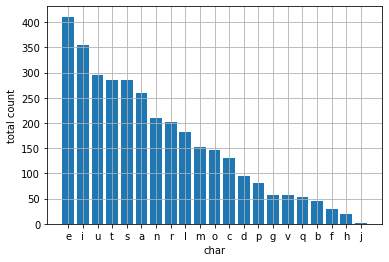

In [290]:
plt.bar(chars, counts)
plt.xlabel('char')
plt.ylabel('total count')
plt.grid()
plt.show()

In [291]:
print('Всего в {} записях {} текстовых символа.'.format(len(text_array), sum(counts)))

Всего в 5 записях 3358 текстовых символа.
